# Recommendation System


## Data Description:

Unique ID of each anime.

Anime title.

Anime broadcast type, such as TV, OVA, etc.

anime genre.

The number of episodes of each anime.

The average rating for each anime compared to the number of users who gave ratings.

Number of community members for each anime.
                           
## Objective:

The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 

## Dataset:

Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

## Tasks:

### Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).

Handle missing values, if any.

Explore the dataset to understand its structure and attributes.

### Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).

Convert categorical features into numerical representations if necessary.

Normalize numerical features if required.

### Recommendation System:

Design a function to recommend anime based on cosine similarity.

Given a target anime, recommend a list of similar anime based on cosine similarity scores.

Experiment with different threshold values for similarity scores to adjust the recommendation list size.

### Evaluation:

Split the dataset into training and testing sets.

Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.

Analyze the performance of the recommendation system and identify areas of improvement.

### Interview Questions:

1. Can you explain the difference between user-based and item-based collaborative filtering?

2. What is collaborative filtering, and how does it work?

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("F:\\DATA SCIENCE_ExcelR\\Assignments\\Recommendation System\\anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df['genre']=df['genre'].fillna('')
df['type']=df['type'].fillna('unknown')
df['rating']=df['rating'].fillna(df['rating'].mean())

In [7]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [13]:
df.nunique()

anime_id    12294
name        12292
genre        3265
type            7
episodes      187
rating        599
members      6706
dtype: int64

In [15]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3265, dtype: int64

In [17]:
df['name'].nunique()

12292

In [19]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', 'unknown'],
      dtype=object)

In [21]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
unknown      25
Name: count, dtype: int64

In [23]:
df['rating'].describe()

count    12294.000000
mean         6.473902
std          1.017096
min          1.670000
25%          5.900000
50%          6.550000
75%          7.170000
max         10.000000
Name: rating, dtype: float64

In [25]:
df.duplicated().sum()

0

In [27]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Taka no Tsume 8: Yoshida-kun no X-Files    10.00
Spoon-hime no Swing Kitchen                 9.60
Mogura no Motoro                            9.50
Kimi no Na wa.                              9.37
Kahei no Umi                                9.33
Fullmetal Alchemist: Brotherhood            9.26
Gintama°                                    9.25
Yakusoku: Africa Mizu to Midori             9.25
Steins;Gate                                 9.17
Gintama&#039;                               9.16
Name: rating, dtype: float64

In [29]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Shi Wan Ge Leng Xiaohua                         2
Saru Kani Gassen                                2
&quot;0&quot;                                   1
Otoshidama                                      1
Otome Nadeshiko Koi Techou                      1
Otome Youkai Zakuro                             1
Otome Youkai Zakuro Picture Drama               1
Otome wa Boku ni Koishiteru                     1
Otome wa Boku ni Koishiteru Special             1
Otome wa Boku ni Koishiteru: Futari no Elder    1
Name: rating, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()
df[['rating_scale','members_scale']]=scaler.fit_transform(df[['rating','members']])

In [34]:
df[['rating_scale','members_scale']].head()

,rating_scale,members_scale
0,0.924370,0.197872
1,0.911164,0.782770
2,0.909964,0.112689
3,0.900360,0.664325
4,0.899160,0.149186


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [36]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_genre = tfidf.fit_transform(df['genre'] + " " + df['type'])

In [41]:
features = hstack([tfidf_genre, np.array(df[['rating_scale', 'members_scale']])])

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
cosine_sim = cosine_similarity(features, features)

In [48]:
cosine_sim

array([[1.        , 0.52502301, 0.46247873, ..., 0.24157166, 0.24807781,
        0.43536683],
       [0.52502301, 1.        , 0.53788793, ..., 0.20971947, 0.2153503 ,
        0.24148453],
       [0.46247873, 0.53788793, 1.        , ..., 0.24118659, 0.24768518,
        0.27776899],
       ...,
       [0.24157166, 0.20971947, 0.24118659, ..., 1.        , 0.99994581,
        0.69979952],
       [0.24807781, 0.2153503 , 0.24768518, ..., 0.99994581, 1.        ,
        0.70157449],
       [0.43536683, 0.24148453, 0.27776899, ..., 0.69979952, 0.70157449,
        1.        ]])

In [49]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [50]:
def recommendations(anime_name, threshold=0.2):

    if anime_name not in indices:
        return f"'{anime_name}' not found in the dataset."

    idx = indices[anime_name]

    sim_scores = list(enumerate(cosine_sim[idx]))

    filtered_scores = []
    for i, score in sim_scores:
        if i != idx and score > threshold:
            filtered_scores.append((i, score))

    filtered_scores.sort(key=lambda x: x[1], reverse=True)

    top_indices = [i[0] for i in filtered_scores[:10]]

    return df[['name', 'type', 'rating']].iloc[top_indices]


In [51]:
anime_name = "Naruto"
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

for t in thresholds:
    print("\n" + "="*40)
    print(f"Recommendations for '{anime_name}' with threshold = {t}")
    print("="*40)
    
    recs = recommendations(anime_name, threshold=t)
    
    # Show recommendations
    if isinstance(recs, str):
        print(recs)
    else:
        print(recs[['name', 'rating']])
        print(f"Total recommendations: {len(recs)}")



Recommendations for 'Naruto' with threshold = 0.1
                                                   name  rating
615                                  Naruto: Shippuuden    7.94
206                                       Dragon Ball Z    8.32
346                                         Dragon Ball    8.16
588                                     Dragon Ball Kai    7.95
1930                                  Dragon Ball Super    7.40
1472        Naruto: Shippuuden Movie 4 - The Lost Tower    7.53
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...    7.50
486                            Boruto: Naruto the Movie    8.03
2342                             Kurokami The Animation    7.29
1796                                     Rekka no Honoo    7.44
Total recommendations: 10

Recommendations for 'Naruto' with threshold = 0.2
                                                   name  rating
615                                  Naruto: Shippuuden    7.94
206                                     

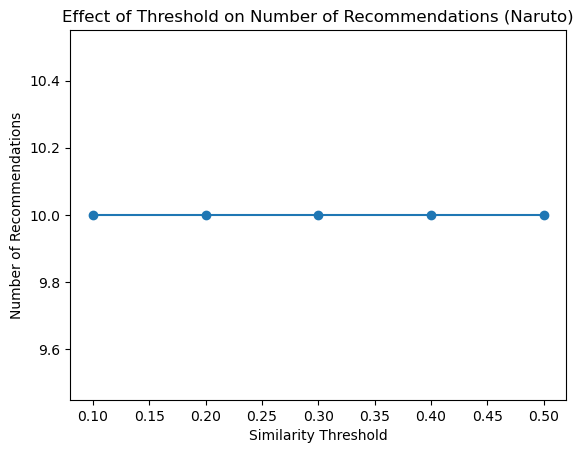

In [52]:
import matplotlib.pyplot as plt

counts = []
for t in thresholds:
    recs = recommendations(anime_name, threshold=t)
    counts.append(len(recs) if not isinstance(recs, str) else 0)

plt.plot(thresholds, counts, marker='o')
plt.title(f"Effect of Threshold on Number of Recommendations ({anime_name})")
plt.xlabel("Similarity Threshold")
plt.ylabel("Number of Recommendations")
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [55]:
features_csr = features.tocsr()

In [56]:
train_features = features_csr[train.index]
test_features = features_csr[test.index]

In [57]:
print("Training set shape:", train_features.shape)
print("Testing set shape:", test_features.shape)
print("Training data records:", len(train))
print("Testing data records:", len(test))

Training set shape: (9835, 54)
Testing set shape: (2459, 54)
Training data records: 9835
Testing data records: 2459


In [58]:
cosine_sim_train = cosine_similarity(train_features, train_features)

In [59]:
train_indices_mapping = pd.Series(data=range(len(train)), index=train['name'])

In [60]:
def recommend_train(anime_name, threshold=0.2):
    if anime_name not in train_indices_mapping:
        return f"'{anime_name}' not found in the training set."

    idx = train_indices_mapping[anime_name]

    sim_scores = list(enumerate(cosine_sim_train[idx]))

    filtered_scores = [(i, score) for i, score in sim_scores if i != idx and score > threshold]

    filtered_scores.sort(key=lambda x: x[1], reverse=True)

    top_scores = filtered_scores[:10]

    anime_indices = [i for i, _ in top_scores]
    similarities = [round(score, 2) for _, score in top_scores]

    recommendations = train.iloc[anime_indices][['name', 'type', 'rating']].copy()
    recommendations['Similarity'] = similarities
    return recommendations.reset_index(drop=True)

In [82]:
test_anime = train.sample(1)['name'].values[0]
print(f"Recommendations for Anime: {test_anime}\n")

recommendations = recommend_train(test_anime, threshold=0.2)
print(recommendations)

Recommendations for Anime: Karen Senki

                                                name type  rating  Similarity
0  Gunslinger Stratos: The Animation - Kikan/Kaze...  ONA    6.08        1.00
1                                 Gunslinger Stratos  ONA    6.19        1.00
2                                Nanocore 2nd Season  ONA    5.33        1.00
3                                   Master of Torque  ONA    5.25        1.00
4                            Busou Shinki Moon Angel  ONA    6.68        1.00
5                                 Master of Torque 3  ONA    4.83        0.99
6                                           6 Angels  ONA    4.59        0.99
7                   Soul Worker: Your Destiny Awaits  ONA    6.20        0.93
8                           Mou Hitotsu no Mirai wo.  ONA    6.19        0.93
9                                           Nanocore  ONA    6.17        0.93


In [85]:

threshold_values = [0.8, 0.85, 0.9, 0.92, 0.95]

test_anime = train.sample(1)['name'].values[0]

print(f"Base Anime for Analysis: {test_anime}\n")
results = []

for threshold in threshold_values:
    recommendations = recommend_train(test_anime, threshold)
    
    if isinstance(recommendations, str):  # In case anime not found
        continue
    
    count = len(recommendations)
    avg_similarity = round(recommendations['Similarity'].mean(), 3) if count > 0 else 0
    results.append({'Threshold': threshold, 'Recommended Count': count, 'Average Similarity': avg_similarity})

threshold_df = pd.DataFrame(results)
print("Threshold vs Recommendations:\n")
print(threshold_df)


Base Anime for Analysis: Winter Garden

Threshold vs Recommendations:

   Threshold  Recommended Count  Average Similarity
0       0.80                 10               0.913
1       0.85                 10               0.913
2       0.90                  7               0.924
3       0.92                  3               0.937
4       0.95                  1               0.950


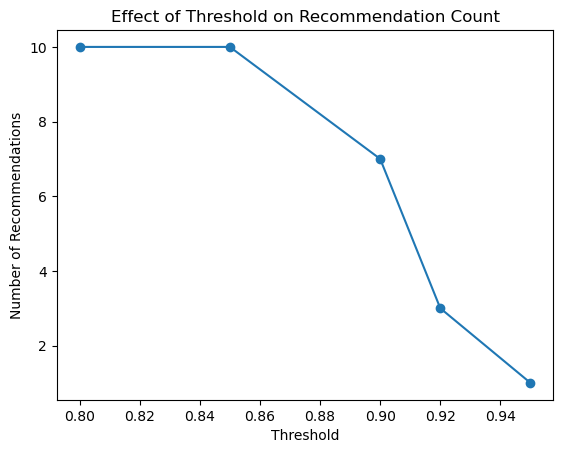

In [87]:
plt.plot(threshold_df['Threshold'], threshold_df['Recommended Count'], marker='o')
plt.title("Effect of Threshold on Recommendation Count")
plt.xlabel("Threshold")
plt.ylabel("Number of Recommendations")
plt.show()



### Interview Questions:

##### 1. Can you explain the difference between user-based and item-based collaborative filtering?

* User-based CF: Find users similar to you and recommend what they liked.

* Item-based CF: Find items similar to what you liked and recommend them.

##### 2. What is collaborative filtering, and how does it work?

* Collaborative filtering uses user behavior (ratings, clicks) to recommend items without needing content features.

* Works by finding patterns in users’ preferences or item similarity.